In [14]:
from sklearn import datasets
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split


from imblearn.metrics import geometric_mean_score
from imblearn import over_sampling as os
from imblearn import pipeline as pl
from imblearn.metrics import classification_report_imbalanced

print(__doc__)

RANDOM_STATE = 42

# Generate a dataset
X, y = datasets.make_classification(
    n_classes=2,
    class_sep=2,
    weights=[0.1, 0.9],
    n_informative=10,
    n_redundant=1,
    flip_y=0,
    n_features=20,
    n_clusters_per_class=4,
    n_samples=5000,
    random_state=RANDOM_STATE,
)

Automatically created module for IPython interactive environment


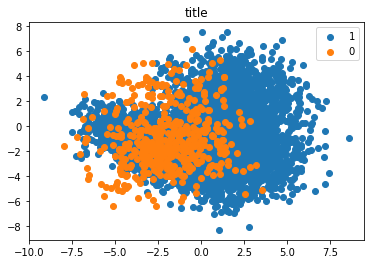

Counter({1: 4500, 0: 500})


In [10]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

c = Counter(y)
for label, _ in c.items() :
    
    rowix = np.where(y == label)[0]
    plt.scatter(X[rowix, 0], X[rowix, 1], label=str(label))

plt.legend()
plt.title("title")
plt.show()

print(c)

In [16]:
pipeline = pl.make_pipeline(
    os.SMOTE(random_state=RANDOM_STATE), LinearSVC(random_state=RANDOM_STATE)
)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

# Train the classifier with balancing
pipeline.fit(X_train, y_train)

# Test the classifier and get the prediction
y_pred_bal = pipeline.predict(X_test)

# Show the classification report
print(classification_report_imbalanced(y_test, y_pred_bal))

print(f"The geometric mean is {geometric_mean_score(y_test, y_pred_bal):.3f}")

                   pre       rec       spe        f1       geo       iba       sup

          0       0.41      0.84      0.87      0.55      0.85      0.73       123
          1       0.98      0.87      0.84      0.92      0.85      0.73      1127

avg / total       0.92      0.87      0.84      0.89      0.85      0.73      1250

The geometric mean is 0.854


/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [15]:
pipeline = pl.make_pipeline(
    LinearSVC(random_state=RANDOM_STATE)
)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

# Train the classifier with balancing
pipeline.fit(X_train, y_train)

# Test the classifier and get the prediction
y_pred_bal = pipeline.predict(X_test)

# Show the classification report
print(classification_report_imbalanced(y_test, y_pred_bal))

print(f"The geometric mean is {geometric_mean_score(y_test, y_pred_bal):.3f}")

                   pre       rec       spe        f1       geo       iba       sup

          0       0.82      0.63      0.98      0.71      0.79      0.59       123
          1       0.96      0.98      0.63      0.97      0.79      0.64      1127

avg / total       0.95      0.95      0.66      0.95      0.79      0.63      1250

The geometric mean is 0.785


/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
